In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

# Example 1: Diffusion (random transitions) with Rewards in corners

In [2]:
# define the enviornment
n_rows, n_columns = 20, 20

sparse_diffusion_matrix = utils.make_diffision_transition_matrix(n_rows, n_columns, sparse=True)

tiling = utils.define_lattice_tiling(n_rows, n_columns,)

R = np.ones(n_rows * n_columns) * 0
gamma = 0.8
R[0] = 1.0
R[n_columns-1] = 1.0 
R[-1] = 1.0
R[-n_columns] = 1.0

V_0 = utils.draw_random_rewards(n_rows, n_columns, stdev=0.1)
V_a = V_0[:R.shape[0] // 2]
V_b = V_0[R.shape[0] // 2:]

k = 10
V_estimates = np.zeros((R.shape[0], k+1))
V_estimates[tiling, 0] = V_a
V_estimates[~tiling, 0] = V_b


# dynamic programming algorithm
for ii in range(1, k+1):
    V_a =  R[tiling] + gamma * sparse_diffusion_matrix[tiling][:, ~tiling].dot(V_b)
    V_b =  R[~tiling] + gamma * sparse_diffusion_matrix[~tiling][:, tiling].dot(V_a)

    # save reward functions for measurements
    V_estimates[tiling, ii] = V_a
    V_estimates[~tiling, ii] = V_b

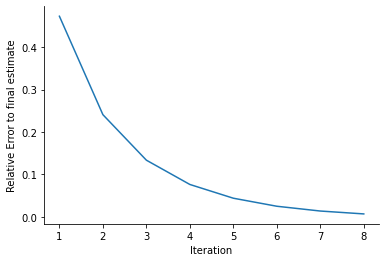

In [3]:
error = np.linalg.norm(V_estimates[:,:k-1] -  np.tile(V_estimates[:, -1].reshape(-1, 1), (1, k-1)), axis=0)
plt.plot(np.arange(1, len(error)), error[1:] / np.max(error))
plt.ylabel('Relative Error to final estimate')
plt.xlabel('Iteration')
sns.despine()

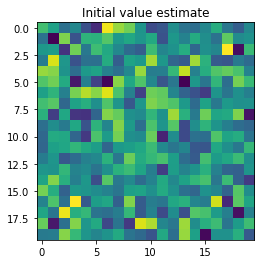

In [4]:
plt.imshow(V_estimates[:,0].reshape(n_rows, n_columns), cmap='viridis')
plt.title('Initial value estimate')
plt.savefig('2dDrift_v0.pdf', dpi=300)

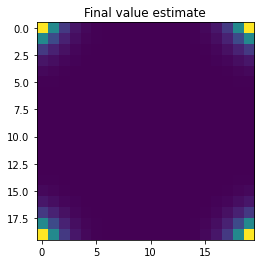

In [5]:
plt.title('Final value estimate')
plt.imshow(V_estimates[:,k-1].reshape(n_rows, n_columns), cmap='viridis', vmin=0, vmax=1)
plt.savefig('2dDrift_vf.pdf', dpi=300)

# Example 2: 1D Diffusion with Reward on one end

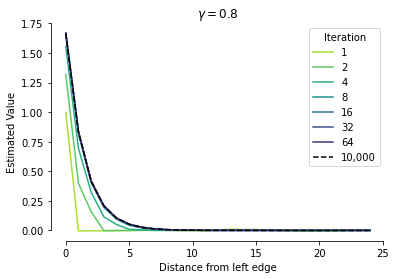

In [6]:
# define the enviornment
n_rows, n_columns = 1, 25

sparse_diffusion_matrix = utils.make_diffision_transition_matrix(n_rows, n_columns, sparse=True)

tiling = utils.define_lattice_tiling(n_rows, n_columns,)

R = np.ones(n_rows * n_columns) * 0
gamma = 0.8
R[0] = 1.0


V_0 = utils.draw_random_rewards(n_rows, n_columns, stdev=0.01)
V_a = V_0[:R.shape[0] // 2]
V_b = V_0[R.shape[0] // 2:]

k = 10000
V_estimates = np.zeros((R.shape[0], k+1))
V_estimates[tiling, 0] = V_a
V_estimates[~tiling, 0] = V_b


# dynamic programming algorithm
for ii in range(1, k+1):
    V_a =  R[tiling] + gamma * sparse_diffusion_matrix[tiling][:, ~tiling].dot(V_b)
    V_b =  R[~tiling] + gamma * sparse_diffusion_matrix[~tiling][:, tiling].dot(V_a)

    # save reward functions for measurements
    V_estimates[tiling, ii] = V_a
    V_estimates[~tiling, ii] = V_b
    
# plot the results
n_steps = 7
cc = sns.color_palette('viridis_r', n_colors=n_steps)
for ii in range(n_steps):
    plt.plot(V_estimates[:, 2**ii], label=f'{2**ii}', c=cc[ii])
plt.plot(V_estimates[:, -1], label=f'10,000', c='k', ls='--')
plt.ylabel('Estimated Value')
plt.xlabel('Distance from left edge')
plt.legend(title='Iteration')
plt.title(r'$\gamma={}$'.format(gamma))
sns.despine(trim=True)
plt.savefig('1dDrift_g8.pdf', dpi=300)

error_g08  = np.linalg.norm(V_estimates[:, 1:-1] - np.tile(V_estimates[:, -1].reshape(-1, 1), (1, k-1)), axis=0)



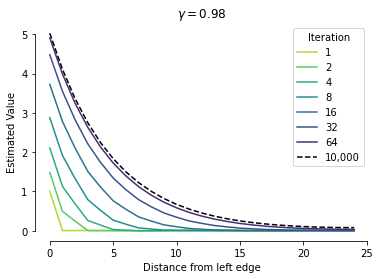

In [7]:
# define the enviornment
n_rows, n_columns = 1, 25

sparse_diffusion_matrix = utils.make_diffision_transition_matrix(n_rows, n_columns, sparse=True)

tiling = utils.define_lattice_tiling(n_rows, n_columns,)

R = np.ones(n_rows * n_columns) * 0
gamma = 0.98
R[0] = 1.0


V_0 = utils.draw_random_rewards(n_rows, n_columns, stdev=0.01)
V_a = V_0[:R.shape[0] // 2]
V_b = V_0[R.shape[0] // 2:]

k = 10000
V_estimates = np.zeros((R.shape[0], k+1))
V_estimates[tiling, 0] = V_a
V_estimates[~tiling, 0] = V_b


# dynamic programming algorithm
for ii in range(1, k+1):
    V_a =  R[tiling] + gamma * sparse_diffusion_matrix[tiling][:, ~tiling].dot(V_b)
    V_b =  R[~tiling] + gamma * sparse_diffusion_matrix[~tiling][:, tiling].dot(V_a)

    # save reward functions for measurements
    V_estimates[tiling, ii] = V_a
    V_estimates[~tiling, ii] = V_b
    
# plot the results
n_steps = 7
cc = sns.color_palette('viridis_r', n_colors=n_steps)
for ii in range(n_steps):
    plt.plot(V_estimates[:, 2**ii], label=f'{2**ii}', c=cc[ii])
plt.plot(V_estimates[:, -1], label=f'10,000', c='k', ls='--')
plt.ylabel('Estimated Value')
plt.xlabel('Distance from left edge')
plt.legend(title='Iteration')
plt.title(r'$\gamma={}$'.format(gamma))
sns.despine(trim=True)
plt.savefig('1dDrift_g98.pdf', dpi=300)


error_g98  = np.linalg.norm(V_estimates[:, 1:-1] - np.tile(V_estimates[:, -1].reshape(-1, 1), (1, k-1)), axis=0)



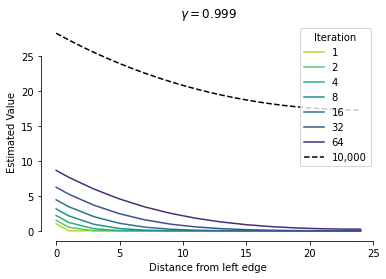

In [8]:
# define the enviornment
n_rows, n_columns = 1, 25

sparse_diffusion_matrix = utils.make_diffision_transition_matrix(n_rows, n_columns, sparse=True)

tiling = utils.define_lattice_tiling(n_rows, n_columns,)

R = np.ones(n_rows * n_columns) * 0
gamma = 0.999
R[0] = 1.0


V_0 = utils.draw_random_rewards(n_rows, n_columns, stdev=0.01)
V_a = V_0[:R.shape[0] // 2]
V_b = V_0[R.shape[0] // 2:]

k = 10000
V_estimates = np.zeros((R.shape[0], k+1))
V_estimates[tiling, 0] = V_a
V_estimates[~tiling, 0] = V_b


# dynamic programming algorithm
for ii in range(1, k+1):
    V_a =  R[tiling] + gamma * sparse_diffusion_matrix[tiling][:, ~tiling].dot(V_b)
    V_b =  R[~tiling] + gamma * sparse_diffusion_matrix[~tiling][:, tiling].dot(V_a)

    # save reward functions for measurements
    V_estimates[tiling, ii] = V_a
    V_estimates[~tiling, ii] = V_b
    
# plot the results
n_steps = 7
cc = sns.color_palette('viridis_r', n_colors=n_steps)
for ii in range(n_steps):
    plt.plot(V_estimates[:, 2**ii], label=f'{2**ii}', c=cc[ii])
plt.plot(V_estimates[:, -1], label=f'10,000', c='k', ls='--')
plt.ylabel('Estimated Value')
plt.xlabel('Distance from left edge')
plt.legend(title='Iteration')
plt.title(r'$\gamma={}$'.format(gamma))
sns.despine(trim=True)

error_g99  = np.linalg.norm(V_estimates[:, 1:-1] - np.tile(V_estimates[:, -1].reshape(-1, 1), (1, k-1)), axis=0)




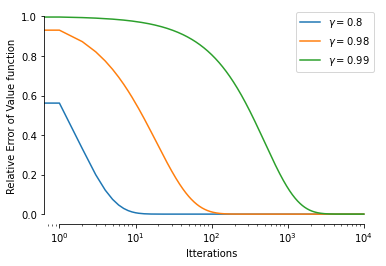

In [9]:
plt.plot(error_g08/np.max(error_g08), label=r'$\gamma = {}$'.format(0.8))
plt.plot(error_g98/np.max(error_g98), label=r'$\gamma = {}$'.format(0.98))
plt.plot(error_g99/np.max(error_g99), label=r'$\gamma = {}$'.format(0.99))
plt.xscale('log')
plt.legend()
plt.xlabel('Itterations')
plt.ylabel('Relative Error of Value function')
sns.despine(trim=True)
# plt.yscale()
plt.savefig('gamma_complexity.pdf', dpi=300)



## Example 3: Needle in a Haystack
This is designed as an example that is difficult for MCTS but easy for Value iteration. Note: these are the first simulations to derive a meaningful policy (the above were diffusion policies).


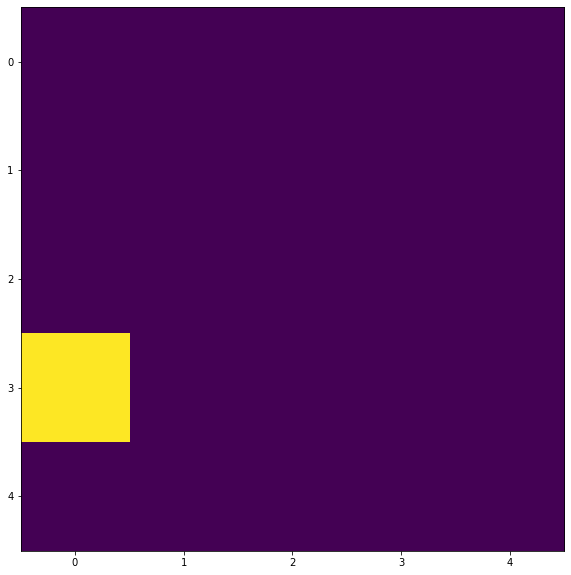

In [151]:
# define the enviornment
n_rows, n_columns = 5, 5

tiling = utils.define_lattice_tiling(n_rows, n_columns,)

# define the reward purely in terms of sucessor states
state_reward_function = np.ones(n_rows * n_columns) * 0
gamma = 0.95
state_reward_function[3 * n_columns + (n_columns // 8)] = 1.0



plt.figure(figsize=(10, 10))
plt.imshow(state_reward_function.reshape(n_rows, n_columns))

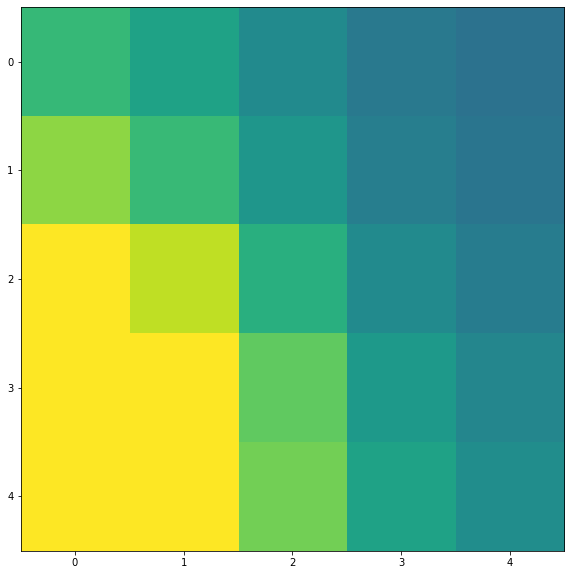

In [152]:
# show the Value function over states without regard to policy

sparse_diffusion_matrix = utils.make_diffision_transition_matrix(n_rows, n_columns, sparse=False)

V_0 = utils.draw_random_rewards(n_rows, n_columns, stdev=0.1)
V_a = V_0[:state_reward_function.shape[0] // 2]
V_b = V_0[state_reward_function.shape[0] // 2:]

k = 10000
V_estimates = np.zeros((state_reward_function.shape[0], k+1))
V_estimates[tiling, 0] = V_a
V_estimates[~tiling, 0] = V_b


# dynamic programming algorithm
for ii in range(1, k+1):
    V_a =  state_reward_function[tiling] + gamma * sparse_diffusion_matrix[tiling][:, ~tiling].dot(V_b)
    V_b =  state_reward_function[~tiling] + gamma * sparse_diffusion_matrix[~tiling][:, tiling].dot(V_a)

    # save reward functions for measurements
    V_estimates[tiling, ii] = V_a
    V_estimates[~tiling, ii] = V_b
    
plt.figure(figsize=(10, 10))
plt.imshow(V_estimates[:,k-1].reshape(n_rows, n_columns), cmap='viridis', vmin=0, vmax=1)
# plt.savefig('2dDrift_vf.pdf', dpi=300)

In [153]:
common_kwargs = dict(n_rows=n_rows, n_columns=n_columns)
transition_functions = utils.make_cardinal_transition_matrix(**common_kwargs)

state_action_reward_functions = utils.get_state_action_reward_from_sucessor_rewards(
    state_reward_function,transition_functions
)

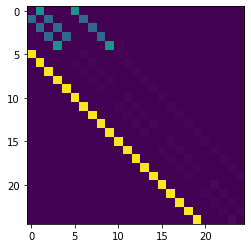

In [156]:
plt.imshow(transition_functions[0])

In [172]:
transition_functions[1][5,:]

array([0.96666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01666667, 0.        , 0.        , 0.        ,
       0.01666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

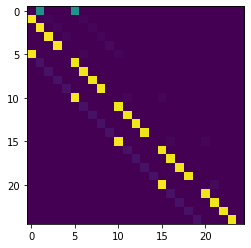

In [157]:
plt.imshow(transition_functions[1])

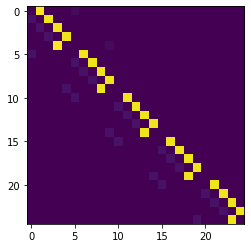

In [159]:
plt.imshow(transition_functions[2])

In [259]:
diff_trans = utils.make_diffusion_transition(utils.define_valid_lattice_transitions(n_rows, n_columns))
diff_trans

array([[0.        , 0.        , 0.        , 0.5       , 0.5       ],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.        , 0.5       , 0.        , 0.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.33333333],
       [0.25      , 0.25      , 0.        , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.        , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.        , 0.25      , 0.25      ],
       [0.33333333, 0.33333333, 0.        , 0.        , 0.33333333],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.33333333],
       [0.25      , 0.25      , 0.        , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.        , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.        , 0.25      , 0.25      ],
       [0.33333333, 0.33333333, 0.

In [261]:
slip_probability = 0.2
def _map_movement(x, index):
    if np.isclose(x[index], 0):
        return x
    
    output = np.array(x) * slip_probability
    output[index] += 1 - slip_probability
    return list(output)
ii = 1
# print(ii)
print(diff_trans[1].round(3))
_map_movement(diff_trans[1].round(3), ii)
np.array([list(map(lambda q: _map_movement(q, ii), diff_trans)) for ii in [1]]).round(3)

[0.    0.333 0.    0.333 0.333]


array([[[0.   , 0.   , 0.   , 0.5  , 0.5  ],
        [0.   , 0.867, 0.   , 0.067, 0.067],
        [0.   , 0.867, 0.   , 0.067, 0.067],
        [0.   , 0.867, 0.   , 0.067, 0.067],
        [0.   , 0.9  , 0.   , 0.   , 0.1  ],
        [0.333, 0.   , 0.   , 0.333, 0.333],
        [0.05 , 0.85 , 0.   , 0.05 , 0.05 ],
        [0.05 , 0.85 , 0.   , 0.05 , 0.05 ],
        [0.05 , 0.85 , 0.   , 0.05 , 0.05 ],
        [0.067, 0.867, 0.   , 0.   , 0.067],
        [0.333, 0.   , 0.   , 0.333, 0.333],
        [0.05 , 0.85 , 0.   , 0.05 , 0.05 ],
        [0.05 , 0.85 , 0.   , 0.05 , 0.05 ],
        [0.05 , 0.85 , 0.   , 0.05 , 0.05 ],
        [0.067, 0.867, 0.   , 0.   , 0.067],
        [0.333, 0.   , 0.   , 0.333, 0.333],
        [0.05 , 0.85 , 0.   , 0.05 , 0.05 ],
        [0.05 , 0.85 , 0.   , 0.05 , 0.05 ],
        [0.05 , 0.85 , 0.   , 0.05 , 0.05 ],
        [0.067, 0.867, 0.   , 0.   , 0.067],
        [0.5  , 0.   , 0.   , 0.5  , 0.   ],
        [0.067, 0.867, 0.   , 0.067, 0.   ],
        [0

In [253]:
diff_trans

array([[0.        , 0.        , 0.        , 0.5       , 0.5       ],
       [0.        , 0.86666667, 0.        , 0.06666667, 0.06666667],
       [0.        , 0.86666667, 0.        , 0.06666667, 0.06666667],
       [0.        , 0.86666667, 0.        , 0.06666667, 0.06666667],
       [0.        , 0.9       , 0.        , 0.        , 0.1       ],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.33333333],
       [0.05      , 0.85      , 0.        , 0.05      , 0.05      ],
       [0.05      , 0.85      , 0.        , 0.05      , 0.05      ],
       [0.05      , 0.85      , 0.        , 0.05      , 0.05      ],
       [0.06666667, 0.86666667, 0.        , 0.        , 0.06666667],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.33333333],
       [0.05      , 0.85      , 0.        , 0.05      , 0.05      ],
       [0.05      , 0.85      , 0.        , 0.05      , 0.05      ],
       [0.05      , 0.85      , 0.        , 0.05      , 0.05      ],
       [0.06666667, 0.86666667, 0.

In [199]:
utils.make_cardinal_movements_prob(**common_kwargs, slip_probability=.2)[1]

array([[0.        , 0.        , 0.        , 0.5       , 0.5       ],
       [0.        , 0.86666667, 0.        , 0.06666667, 0.06666667],
       [0.        , 0.86666667, 0.        , 0.06666667, 0.06666667],
       [0.        , 0.86666667, 0.        , 0.06666667, 0.06666667],
       [0.        , 0.9       , 0.        , 0.        , 0.1       ],
       [0.86666667, 0.        , 0.        , 0.06666667, 0.06666667],
       [0.17      , 0.81      , 0.        , 0.01      , 0.01      ],
       [0.17      , 0.81      , 0.        , 0.01      , 0.01      ],
       [0.17      , 0.81      , 0.        , 0.01      , 0.01      ],
       [0.17333333, 0.81333333, 0.        , 0.        , 0.01333333],
       [0.86666667, 0.        , 0.        , 0.06666667, 0.06666667],
       [0.17      , 0.81      , 0.        , 0.01      , 0.01      ],
       [0.17      , 0.81      , 0.        , 0.01      , 0.01      ],
       [0.17      , 0.81      , 0.        , 0.01      , 0.01      ],
       [0.17333333, 0.81333333, 0.

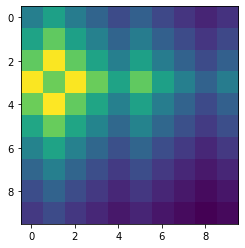

In [145]:
Q, R = utils.value_iteration(transition_functions, state_action_reward_functions, **common_kwargs, iterations=10)
plt.imshow(R.reshape(n_rows, n_columns))

In [146]:
np.argmax(Q, axis=1).reshape(n_rows, n_columns)

array([[3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 1, 1, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [2, 3, 1, 2, 2, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]])

In [147]:
pi = utils.softmax(Q, beta=10)

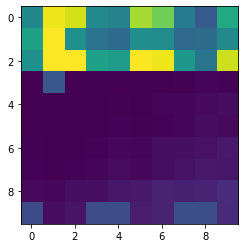

In [148]:
plt.imshow(pi[:, 3].reshape(n_rows, n_columns))

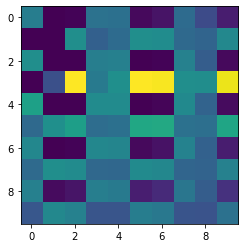

In [149]:
plt.imshow(pi[:, 1].reshape(n_rows, n_columns))

In [150]:
utils.softmax(Q)

array([[0.24659292, 0.28397831, 0.18269989, 0.28672888],
       [0.24362851, 0.20151792, 0.19583595, 0.35901762],
       [0.24640635, 0.2140826 , 0.20665232, 0.33285872],
       [0.24785133, 0.27546938, 0.19464839, 0.28203091],
       [0.24873465, 0.27013666, 0.20581482, 0.27531387],
       [0.24797208, 0.2221095 , 0.21596476, 0.31395366],
       [0.2489026 , 0.2282686 , 0.22349837, 0.29933043],
       [0.24935649, 0.26495438, 0.2165854 , 0.26910373],
       [0.25077702, 0.24778508, 0.24778508, 0.25365283],
       [0.25593154, 0.23095707, 0.23095707, 0.28215433],
       [0.17899436, 0.17899436, 0.31611897, 0.3258923 ],
       [0.1939943 , 0.1939943 , 0.19619963, 0.41581176],
       [0.17639234, 0.31881414, 0.18536019, 0.31943334],
       [0.17345231, 0.27347552, 0.27352312, 0.27954906],
       [0.18731273, 0.27234435, 0.26789112, 0.27245179],
       [0.19129531, 0.30489772, 0.19899744, 0.30480954],
       [0.20347165, 0.29336392, 0.20992693, 0.2932375 ],
       [0.19975092, 0.26792525,

In [108]:
print(transition_functions[1])

[[0.00000000e+00 5.00000000e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.00000000e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [9.66666667e-01 0.00000000e+00 1.66666667e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.66666667e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 9.66666667e-01 0.00000000e+00 1.66666667e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.66666667e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.

In [114]:
T = utils.make_cardinal_transition_matrix(**common_kwargs)
T[0]

array([[0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.33333333, 0.        , 0.        ,
        0.        , 0.33333333, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.